Now let's look at the second question of interest.  That is - What does the data suggest of Bootcamp grads in terms of job placement and salary?

Again, let's read in the data and necessary libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#In this case, we want to look at bootcamp data
#First - let's just look at how many people took a bootcamp in the dataset

bootcamp_df = df[df['TimeAfterBootcamp'].isnull()==False]
not_bootcamp_df = df[df['TimeAfterBootcamp'].isnull()==True] 
bootcamp_df.shape

(882, 154)

In [7]:
# Looks like a reasonable sample of ~2600 people

#Additional questions about bootcamps - they suggest high salaries, placement, 
#helping those with non-traditional backgrounds and diversity break into tech... let's see what
#the data suggests.
bootcamp_df['Gender'].value_counts()

Male                                  624
Female                                101
Other                                   4
Gender non-conforming                   4
Transgender                             1
Transgender; Gender non-conforming      1
Name: Gender, dtype: int64

In [8]:
bootcamp_df['Gender'].value_counts()/(bootcamp_df.shape[0] - sum(bootcamp_df['Gender'].isnull()))

Male                                  0.848980
Female                                0.137415
Other                                 0.005442
Gender non-conforming                 0.005442
Transgender                           0.001361
Transgender; Gender non-conforming    0.001361
Name: Gender, dtype: float64

In [9]:
not_bootcamp_df['Gender'].value_counts()/(not_bootcamp_df.shape[0] - sum(not_bootcamp_df['Gender'].isnull()))

Male                                                       0.906776
Female                                                     0.071376
Other                                                      0.005667
Gender non-conforming                                      0.004107
Male; Other                                                0.003450
Female; Transgender                                        0.002300
Transgender                                                0.001561
Male; Gender non-conforming                                0.001561
Female; Gender non-conforming                              0.000903
Male; Female                                               0.000411
Transgender; Gender non-conforming                         0.000329
Male; Female; Transgender; Gender non-conforming; Other    0.000329
Male; Transgender                                          0.000329
Female; Transgender; Gender non-conforming                 0.000246
Male; Female; Transgender                       

In [7]:
#It does appear there is a small push for diversity overall by bootcamps, but not huge...

In [10]:
bootcamp_df['FormalEducation'].value_counts()/(bootcamp_df.shape[0] - sum(bootcamp_df['FormalEducation'].isnull()))

Bachelor's degree                                                    0.485261
Master's degree                                                      0.239229
Some college/university study without earning a bachelor's degree    0.148526
Secondary school                                                     0.066893
Doctoral degree                                                      0.024943
I prefer not to answer                                               0.014739
Professional degree                                                  0.009070
Primary/elementary school                                            0.005669
I never completed any formal education                               0.005669
Name: FormalEducation, dtype: float64

In [11]:
not_bootcamp_df['FormalEducation'].value_counts()/(not_bootcamp_df.shape[0] - sum(not_bootcamp_df['FormalEducation'].isnull()))

Bachelor's degree                                                    0.421021
Master's degree                                                      0.215807
Some college/university study without earning a bachelor's degree    0.150274
Secondary school                                                     0.118990
Doctoral degree                                                      0.029034
Primary/elementary school                                            0.021899
I prefer not to answer                                               0.021734
Professional degree                                                  0.013557
I never completed any formal education                               0.007684
Name: FormalEducation, dtype: float64

In [10]:
#In terms of formal education it looks basically the same - more bachelors degree holders do 
#bootcamps, but fewer phds do bootcamps.

In [12]:
bootcamp_df['TimeAfterBootcamp'].value_counts()/bootcamp_df.shape[0]

I already had a job as a developer when I started the program    0.479592
I got a job as a developer before completing the program         0.104308
One to three months                                              0.096372
Immediately upon graduating                                      0.095238
I haven't gotten a job as a developer yet                        0.072562
Less than a month                                                0.053288
Four to six months                                               0.035147
Six months to a year                                             0.032880
Longer than a year                                               0.030612
Name: TimeAfterBootcamp, dtype: float64

In [14]:
#So interestingly this data makes it more difficult to analyze the impact of bootcamps,
# as many of the students already had developer jobs before starting the program
# we could remove them?

#If you are truly new to the space, we can rule out that you already have a job as a developer
# then we can look at the other individuals and see which are still not 

not_devs = bootcamp_df[bootcamp_df['TimeAfterBootcamp']!="I already had a job as a developer when I started the program"]

In [15]:
not_devs['TimeAfterBootcamp'].value_counts()/not_devs.shape[0]

I got a job as a developer before completing the program    0.200436
One to three months                                         0.185185
Immediately upon graduating                                 0.183007
I haven't gotten a job as a developer yet                   0.139434
Less than a month                                           0.102397
Four to six months                                          0.067538
Six months to a year                                        0.063181
Longer than a year                                          0.058824
Name: TimeAfterBootcamp, dtype: float64

In [16]:
bootcamp_df[bootcamp_df['Salary']==195000]

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
1696,1697,Professional developer,"Yes, both",United States,No,Employed full-time,Bachelor's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),"10,000 or more employees",...,Disagree,Male,High school,White or of European descent,Disagree,Agree,Disagree,Agree,195000.0,NaN


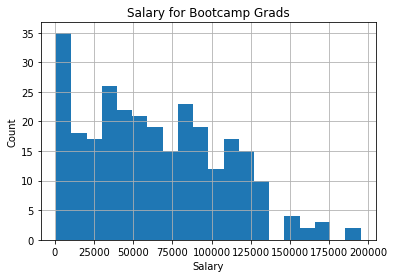

In [17]:
bootcamp_df['Salary'].hist(bins=20);
plt.title('Salary for Bootcamp Grads');
plt.xlabel('Salary');
plt.ylabel('Count');

In [18]:
bootcamp_df['Salary'].describe()

count       280.000000
mean      64136.102882
std       43067.787743
min         860.215054
25%       29960.752688
50%       60000.000000
75%       93187.500000
max      195000.000000
Name: Salary, dtype: float64

In [ ]:
#Here we can get some idea of how bootcamp grades fair, but this isn't straightforward.
#Many of these individuals are not new to the field, and the salaries are all over the place
#But the descriptive statistics here give us some ideas... just nothing really concrete